In [1]:
# Basics
import numpy as np
import pandas as pd
import os

# Scipy
from scipy import optimize
from scipy.ndimage import gaussian_filter
#from sklearn.neighbors import KDTree
from scipy import stats

# Gifs
from PIL import Image
import glob

# Plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, AutoLocator, MaxNLocator
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar
import matplotlib.colors as mcolors
from matplotlib import colors
import matplotlib.ticker as ticker
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D

# RC params
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams["axes.edgecolor"] = 'black'
rcParams["legend.edgecolor"] = '0.8'
plt.rcParams.update({'errorbar.capsize': 2})
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

def fmt(x, pos):
    ''' Used for the x10^ for colourbars'''
    if x == 0:
        return r'0'
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

# Change path

In [2]:
model_path = "/Users/maddie/Desktop/Thesis/Simulation_output/K_Magellan/runw46"
os.chdir(model_path)

In [3]:
col_header = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'iwas', 'id', 'mass']

In [4]:
old = np.load('old.npy')
old = pd.DataFrame(old, columns=col_header)

In [7]:
old.shape

(200000, 9)

In [45]:
disc0 = np.load('gal0.npy')
disc0 = pd.DataFrame(disc0, columns=col_header)

In [57]:
gas0 = np.load('gas0.npy')
gas0 = pd.DataFrame(gas0, columns=col_header)

In [44]:
disc = np.load('gal.npy')
disc = pd.DataFrame(disc, columns=col_header)

In [6]:
disc0 = disc0.assign(v = np.power(disc0.x**2 + disc0.y**2 + disc0.z**2, 0.5))
disc = disc.assign(v = np.power(disc.x**2 + disc.y**2 + disc.z**2, 0.5))

# X-Y Distribution
Initial time step

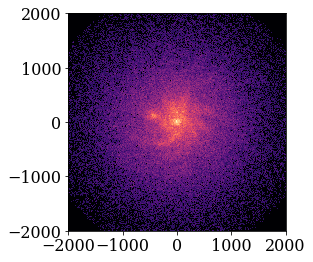

In [12]:
bin_size = 400
rang = 2000
gamma = 0.4
cmap = plt.cm.get_cmap('magma')
hist1, xedges, yedges = np.histogram2d(disc0.x, disc0.y, bins = bin_size, weights = disc0.mass, range=([-rang,rang],[-rang,rang]))
# Gas
fig, ax = plt.subplots()
ax.imshow(hist1.T/100, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap)

final time step

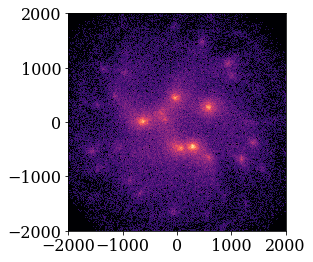

In [31]:
bin_size = 400
rang = 2000
gamma = 0.4
cmap = plt.cm.get_cmap('magma')
hist1, xedges, yedges = np.histogram2d(disc.x, disc.y, bins = bin_size, weights = disc.mass, range=([-rang,rang],[-rang,rang]))
# Gas
fig, ax = plt.subplots()
ax.imshow(hist1.T/100, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap)

## Testing bin sizes on the values of dispersion

bin size is:  10.0


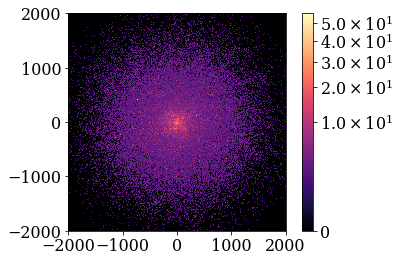

In [29]:
rng = 2000 # 40000 diameter
bin_size = rng*2/10
print('bin size is: ', (rng*2)/bin_size)
gamma = 0.4
cmap = plt.cm.get_cmap('magma')
dischist0, _, _,_ = stats.binned_statistic_2d(disc0.x, disc0.y, 
                                               values = disc0.v, statistic ='std', bins = bin_size, range=([-rng,rng],[-rng,rng]))
fig, ax = plt.subplots()
im1 = ax.imshow(dischist0.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rng, rng, -rng, rng], cmap=cmap)
cb1 = plt.colorbar(mappable = im1 , format=ticker.FuncFormatter(fmt))

bin size is:  50.0


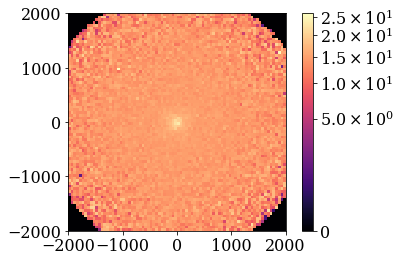

In [30]:
rng = 2000 # 40000 diameter
bin_size = rng*2/50
print('bin size is: ', (rng*2)/bin_size)
gamma = 0.4
cmap = plt.cm.get_cmap('magma')
dischist0, _, _,_ = stats.binned_statistic_2d(disc0.x, disc0.y, 
                                               values = disc0.v, statistic ='std', bins = bin_size, range=([-rng,rng],[-rng,rng]))
fig, ax = plt.subplots()
im1 = ax.imshow(dischist0.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap)
cb1 = plt.colorbar(mappable = im1 , format=ticker.FuncFormatter(fmt))

bin size is:  100.0


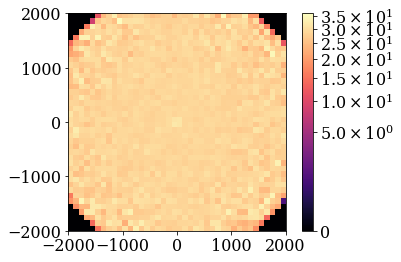

In [31]:
rng = 2000 # 40000 diameter
bin_size = rng*2/100
print('bin size is: ', (rng*2)/bin_size)
gamma = 0.4
cmap = plt.cm.get_cmap('magma')
dischist0, _, _,_ = stats.binned_statistic_2d(disc0.x, disc0.y, 
                                               values = disc0.v, statistic ='std', bins = bin_size, range=([-rng,rng],[-rng,rng]))
fig, ax = plt.subplots()
im1 = ax.imshow(dischist0.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rng, rng, -rng, rng], cmap=cmap)
cb1 = plt.colorbar(mappable = im1 , format=ticker.FuncFormatter(fmt))

bin size is:  500.0


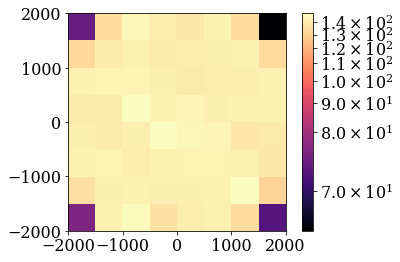

In [32]:
rng = 2000 # 40000 diameter
bin_size = rng*2/500
print('bin size is: ', (rng*2)/bin_size)
gamma = 0.4
cmap = plt.cm.get_cmap('magma')
dischist0, _, _,_ = stats.binned_statistic_2d(disc0.x, disc0.y, 
                                               values = disc0.v, statistic ='std', bins = bin_size, range=([-rng,rng],[-rng,rng]))
fig, ax = plt.subplots()
im1 = ax.imshow(dischist0.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rng, rng, -rng, rng], cmap=cmap)
cb1 = plt.colorbar(mappable = im1 , format=ticker.FuncFormatter(fmt))

bin size is:  800.0


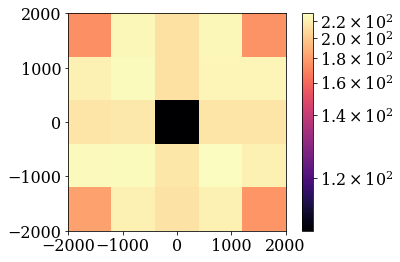

In [33]:
rng = 2000 # 40000 diameter
bin_size = rng*2/800
print('bin size is: ', (rng*2)/bin_size)
gamma = 0.4
cmap = plt.cm.get_cmap('magma')
dischist0, _, _,_ = stats.binned_statistic_2d(disc0.x, disc0.y, 
                                               values = disc0.v, statistic ='std', bins = bin_size, range=([-rng,rng],[-rng,rng]))
fig, ax = plt.subplots()
im1 = ax.imshow(dischist0.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rng, rng, -rng, rng], cmap=cmap)
cb1 = plt.colorbar(mappable = im1 , format=ticker.FuncFormatter(fmt))

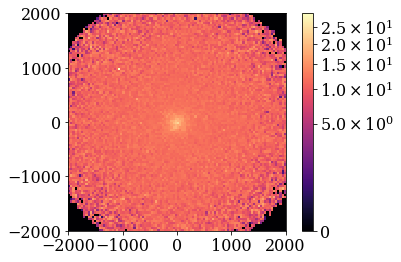

In [20]:
# Gas
fig, ax = plt.subplots()
im1 = ax.imshow(dischist0.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap)
cb1 = plt.colorbar(mappable = im1 , format=ticker.FuncFormatter(fmt))

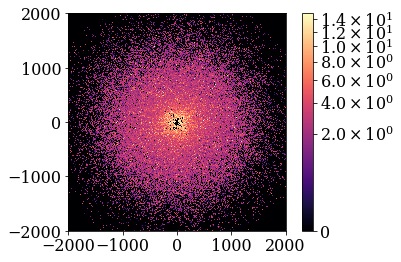

In [61]:
# Gas
fig, ax = plt.subplots()
im1 = ax.imshow(dischist0.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap)
cb1 = plt.colorbar(mappable = im1 , format=ticker.FuncFormatter(fmt))

In [54]:
for i in range(dischist.shape[0]):
    for j in range(dischist.shape[0]):
        if dischist[i][j] > 50:
            dischist[i][j] = 0

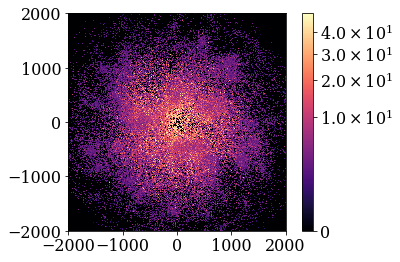

In [55]:
fig, ax = plt.subplots()
im1 = ax.imshow(dischist.T, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap)
cb1 = plt.colorbar(mappable = im1 , format=ticker.FuncFormatter(fmt))

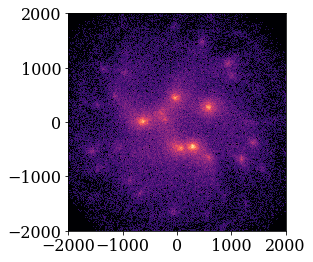

In [42]:
hist1, xedges, yedges = np.histogram2d(disc.x, disc.y, bins = bin_size, weights = disc.mass, range=([-rang,rang],[-rang,rang]))
# Gas
fig, ax = plt.subplots()
ax.imshow(hist1.T/100, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap)

In [43]:
old = np.load('old.npy')
old = pd.DataFrame(old, columns=col_header)

In [ ]:
hist1, xedges, yedges = np.histogram2d(disc.x, disc.y, bins = bin_size, weights = disc.mass, range=([-rang,rang],[-rang,rang]))
# Gas
fig, ax = plt.subplots()
ax.imshow(hist1.T/100, norm=mcolors.PowerNorm(gamma), 
             origin='lower', extent=[-rang, rang, -rang, rang], cmap=cmap)

(0, 50)

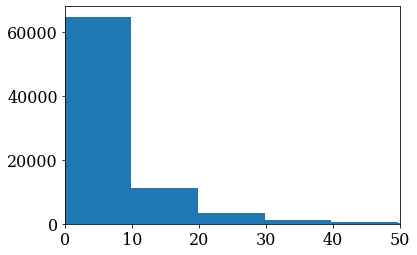

In [50]:
d = dischist.flatten()
plt.hist(d[d >0], bins = 20)
plt.xlim(0,50)

# Formula found online

In [40]:
print('vx dispersion: ', np.std(disc0.vx))
print('vy dispersion: ', np.std(disc0.vy))
print('vz dispersion: ', np.std(disc0.vz))
print('(vx**2 + vy**2 + vz**2)**0.5 dispersion: ', np.std(disc0.v))

vx dispersion:  23.265919296406327
vy dispersion:  23.510852530867755
vz dispersion:  5.054766532936217
(vx**2 + vy**2 + vz**2)**0.5 dispersion:  551.7293152093484


In [46]:
(np.std(disc0.vx)**2 + np.std(disc0.vy)**2 + np.std(disc0.vz)**2)**0.5

33.460631376852334

In [51]:
33.460631376852334/(np.power(3,1/2))

19.318504532680535

In [56]:
(np.std(disc0.vx)**2 + np.std(disc0.vy)**2 + np.std(disc0.vz)**2)**0.5 /3**0.5

19.318504532680535

Formula suggested by Kenji

In [54]:
(np.std(disc.vx)**2 + np.std(disc.vy)**2 + np.std(disc.vz)**2)**0.5 /3**0.5

19.184269309780305

In [58]:
(np.std(gas0.vx)**2 + np.std(gas0.vy)**2 + np.std(gas0.vz)**2)**0.5 /3**0.5

19.953930596457887